## Coding Exercise

### 1. K-Means clustering with simulated data:

all algorithms: https://scikit-learn.org/stable/modules/clustering.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='warn',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the best centroid
    among them.

    'random': cho

#### 1.1. Generate simulated data and visualize:

In [3]:
"""
    make_blobs : Generate isotropic Gaussian blobs for clustering.
"""
make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or array-like of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers 

In [4]:
# 2 Features
# 3 Clusters

x, y = make_blobs(n_samples=100, n_features=2, centers=3) # Creats random sets of data
print(type(x), x.shape)
print(type(y), y.shape, "\n")
print(x[:5], "\n")
print(y[:5], "\n")
print(len(np.unique(x)),)
print(len(np.unique(y)),)

<class 'numpy.ndarray'> (100, 2)
<class 'numpy.ndarray'> (100,) 

[[ 2.72171955  1.37934973]
 [-2.1058895  -4.23919166]
 [ 3.74205383  3.35851572]
 [-1.46575783 -4.7828897 ]
 [ 2.48126146  2.2649767 ]] 

[2 0 2 0 2] 

200
3


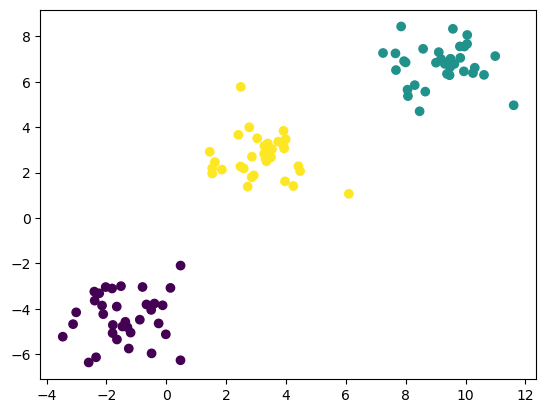

In [5]:
plt.scatter(x[:,0], x[:,1], c=y) 

(100, 3)


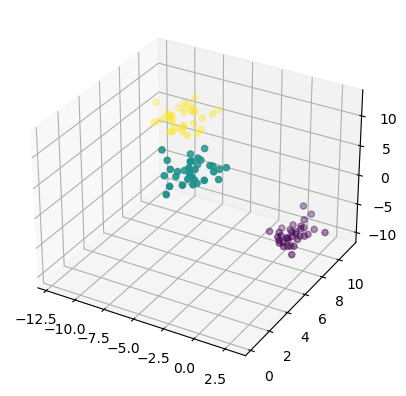

In [6]:
# 3 Features
# 3 Clusters

x, y = make_blobs(n_samples=100, n_features=3, centers=3) # Creats random sets of data
print(x.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], x[:,2], c=y) 

plt.show()

<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


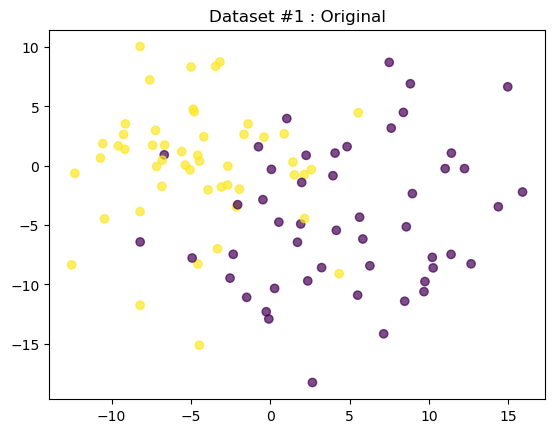

In [7]:
# Dataset #1.

print(type(make_blobs(n_samples=100, n_features=2, centers=2, cluster_std = 5, random_state=123)))
X1, label1 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std = 5, random_state=123) # change the std to see the difference
print(type(X1))
print(type(label1))

plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )   # c is the color, here is like hue in seaborn, label is the cluster
plt.title('Dataset #1 : Original')
plt.show()

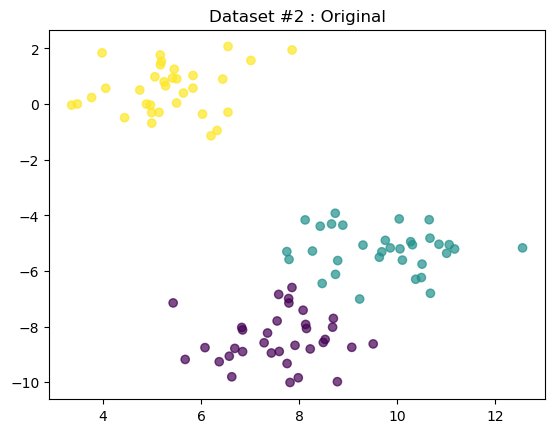

In [8]:
# Dataset #2
X2, label2 = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std = 1, random_state=321)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

#### 1.2. Apply k-means clustering and visualize:

In [9]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init='warn',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the best centroid
    among them.

    'random': cho

100 2


/Users/antoniocoelho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


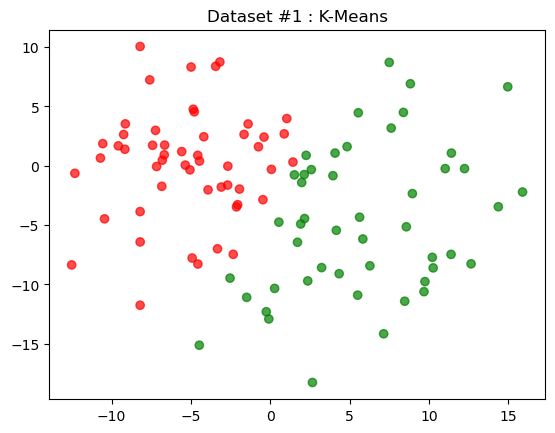

In [10]:
# Dataset #1 and two clusters.
kmeans = KMeans(n_clusters=2,random_state=123)                 # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X1)                                                 # Unsupervised learning => Only X1.    
myColors = {0:'red',1:'green', 2:'blue'}                       # Define a color palette: 0~2.
print(len(kmeans.labels_), len(np.unique(kmeans.labels_)))
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : K-Means')
plt.show()

/Users/antoniocoelho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


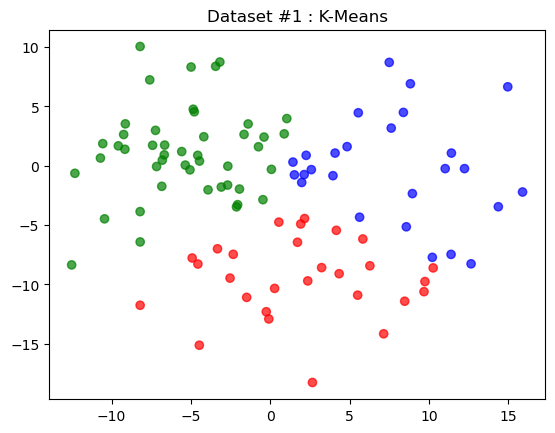

In [11]:
# Dataset #1 and three clusters.
kmeans = KMeans(n_clusters=3,random_state=123)                 # kmeans object for 3 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X1)                                                 # Unsupervised learning => Only X1.    
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 ) 
plt.title('Dataset #1 : K-Means')
plt.show()

/Users/antoniocoelho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


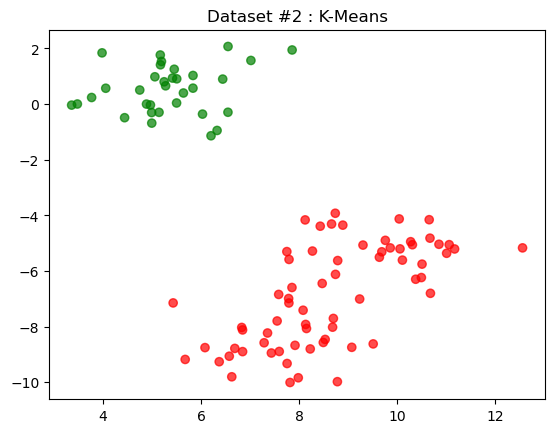

In [12]:
# Dataset #2 and two clusters.
kmeans = KMeans(n_clusters=2,random_state=123)                 # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X2)                                                 # Unsupervised learning => Only X2.    
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )  
plt.title('Dataset #2 : K-Means')
plt.show()

/Users/antoniocoelho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


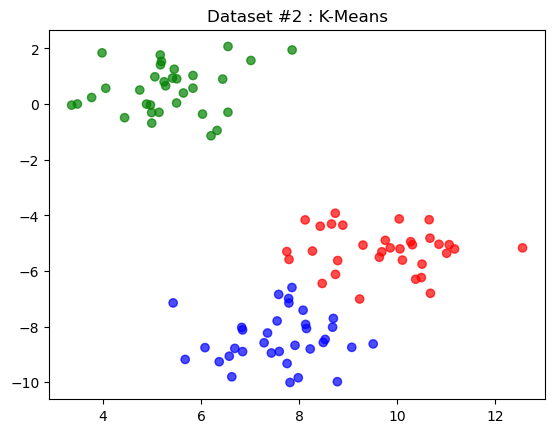

In [13]:
# Dataset #2 and three clusters.
kmeans = KMeans(n_clusters=3, random_state=123)                # kmeans object for 3 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X2)                                                 # Unsupervised learning => Only X2.    
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )  
plt.title('Dataset #2 : K-Means')
plt.show()

/Users/antoniocoelho/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


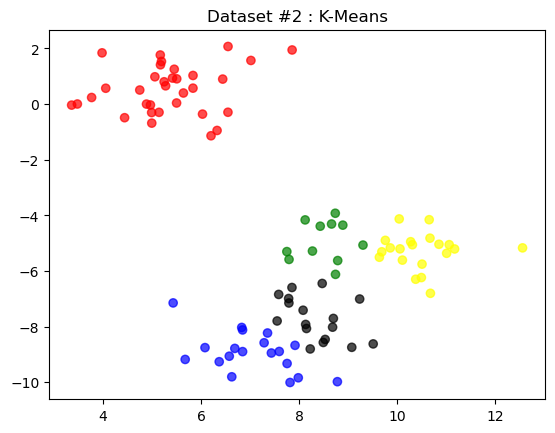

In [14]:
# Dataset #5 and three clusters.
kmeans = KMeans(n_clusters=5)               
myColors = {0:'red',1:'green', 2:'blue', 3:'black', 4:'yellow'}          
kmeans.fit(X2)                                    
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )  
plt.title('Dataset #2 : K-Means')
plt.show()

NOTE: k means clusters have linear boundaries. The clustering result may reveal the existing structure, but this is not always guaranteed.

Adjust the hyperparameters above and consider the results.